In [2]:
from IPython.display import display,Math,Latex
import numpy as np


# Fourier Galerkin(FG)


Here we approximate a function in the form of summation of periodic function of different frequency



# $u=\sum_{k=-\infty}^\infty\hat{u}e^{ikx} \approx U = \sum_{k=-\frac{N}{2}}^\frac N2 a_ke^{ikx} $


###### A basic example of Fourier Transformer to demostrate level of accuracy it have.
For that we will first define some randome varible and take the fourier transformer and then take inverse fourier transform of that and let's see what the result it,Wether it is same of what variable we have or different form it 

In [3]:
import matplotlib.pyplot as plt
import scipy.fftpack as sci
U=10*np.random.rand(1,10)         #declearing randome 1-D array of size 10
U                              #printing U





array([[4.86175858, 5.20918391, 7.24530815, 6.64816908, 3.97804581,
        6.92605144, 3.51727489, 7.99944255, 1.01383333, 2.12059508]])

In [4]:
Uinv=sci.fft(U)              #taking fourier transform
Uinv                         #printing Uinv

array([[49.51966284-0.j        , -4.17236476-6.72760862j,
        -2.16293479-6.95623096j,  3.15524327-0.50713134j,
         6.87262842+5.66702956j, -8.2872213 -0.j        ,
         6.87262842-5.66702956j,  3.15524327+0.50713134j,
        -2.16293479+6.95623096j, -4.17236476+6.72760862j]])

In [5]:
U_resored=(sci.ifft(Uinv)).real      #taking inverse fourier transform

In [6]:
U_resored

array([[4.86175858, 5.20918391, 7.24530815, 6.64816908, 3.97804581,
        6.92605144, 3.51727489, 7.99944255, 1.01383333, 2.12059508]])

In [7]:
Error=U-U_resored                #error calculation for accuracy mesurement
Error.max(),Error.min()          #maximum and minimum error

(8.881784197001252e-16, -1.7763568394002505e-15)

So we can see that after taking inverse of fourior transformation of some random variables which is not governed by any function they are juct random we get error tending to zero

### Now we will sove burgers' equation using Pseuso spectral methode

#### Burgers' Equation 


# $$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}=\nu \frac{\partial^2 u}{\partial x^2} $$

In [66]:
N=1024
t_min=0.00
t_max=2.00
dt=.000100
mu=0.000
a=2*np.pi
x=np.linspace(0,a,1024)
x


array([0.00000000e+00, 6.14192112e-03, 1.22838422e-02, ...,
       6.27090146e+00, 6.27704339e+00, 6.28318531e+00])

In [67]:
UX=np.sin(x)
UX

array([ 0.00000000e+00,  6.14188251e-03,  1.22835333e-02, ...,
       -1.22835333e-02, -6.14188251e-03, -2.44929360e-16])

In [68]:
duk=np.ones(1024,dtype=complex)
dduk=np.ones(1024,dtype=complex)
force_u_n=np.zeros(1024,dtype=float)
# force_u_o=np.zeros(1024)



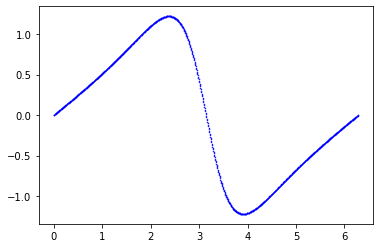

In [55]:
for o in range(1,17000):
    Uk=sci.fft(UX)
    c=complex(0,1)
    for i in range(0,N):
        k=2.0*(np.pi)*float(i)/a
        duk[i]=c*k*Uk[i]
    dux=(sci.ifft(duk)).real
    for i in range(0,N):
        dux[i]=dux[i]/float(N)
        ddux[i]=ddux[i]/float(N)
        force_u_n[i]=UX[i]*dux[i]
        if(o==1):
            UX[i]=UX[i]+dt*force_u_n[i]
        else:
            UX[i]=UX[i]+dt*((3.0/2.0)*force_u_n[i]-(1.0/2.0)*force_u_o[i])
    force_u_o=force_u_n

plt.scatter(x,UX,label= "stars", color= "blue",
            marker= ".", s=1)

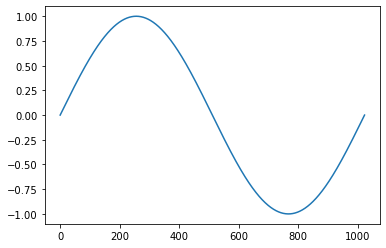

In [33]:
plt.plot(UX)

In [13]:
UX_restored=sci.ifft(Uk).real
UX_restored

array([-6.93889390e-18,  1.50311881e-08,  5.20850904e-08, ...,
       -5.20946340e-08, -1.50327880e-08, -2.54353830e-16])

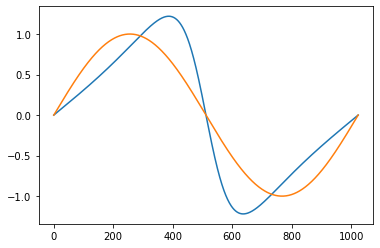

In [56]:
plt.plot(UX)
plt.plot(UX2)


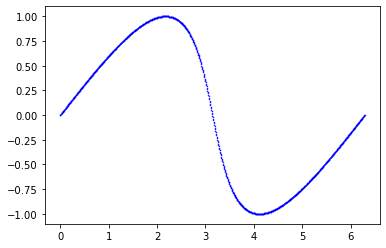

In [69]:
# # proposed correction subjected to verification
for o in range(1,6000):
    Uk=sci.fft(UX)
    c=complex(0,1)
    for i in range(0,N):
#         k=2.0*(np.pi)*float(i)/a
        if i <= N/2:
            k=2.00*(np.pi)*float(i)/a
        else:
            k=2.00*(np.pi)*float(i-N)/a
        duk[i]=c*k*Uk[i]
    dux=(sci.ifft(duk)).real
    for i in range(0,N):
#         dux[i]=dux[i]/float(N)
#         ddux[i]=ddux[i]/float(N)
        force_u_n[i]=-UX[i]*dux[i]
        if(o==1):
            UX[i]=UX[i]+dt*force_u_n[i]
        else:
            UX[i]=UX[i]+dt*((3.0/2.0)*force_u_n[i]-(1.0/2.0)*force_u_o[i])
    force_u_o=force_u_n

plt.scatter(x,UX,label= "stars", color= "blue",
            marker= ".", s=1)